In [1]:
%run ./Vlad_Dissertation.ipynb

/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
/tmp/ipykernel_23037/1247435164.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


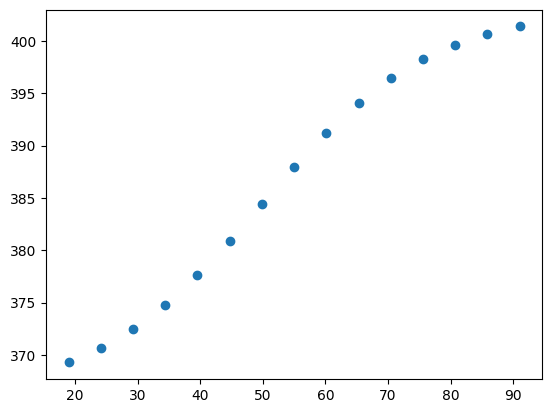

In [2]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
s_distances_sec = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
mydistances = 100 - s_distances_sec * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

##Pre-Training
###Healthy Controls
ymin = 366
ymax = 403
scz_cp = 100 - 1.666 * 30
scz_slope = 1 / 0.075

SCZ_RTs = RTsig(mydistances, scz_cp, scz_slope)
plt.scatter(mydistances, SCZ_RTs)

In [3]:
from scipy.optimize import differential_evolution

HCWat, HCWvt, HCWav = crossmodal(1.3, 2, 1.3, 2, 1.3, 2)
HCLt, HCLa, HCLv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8)


def sczmodelrun(theta):
    HCWt, HCWa, HCWv, SCZBt, SCZBa, SCZBv = FwFb(
        6.5,
        6.5,
        6.5,
        theta[0],
        theta[0],
        theta[0],
        1.185e01,
        7.769e02,
        3.881e01,
        9.517e-01,
    )
    _, _, _, _, SCZrt = experiment(
        ts,
        simtime,
        mydistances,
        5,
        HCLt,
        HCLa,
        HCLv,
        HCWt,
        HCWa,
        HCWv,
        SCZBt,
        SCZBa,
        SCZBv,
        HCWat,
        HCWvt,
        HCWav,
        theta[1],
        0,
    )

    xf = SCZrt
    yf = SCZ_RTs

    m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
        xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
    )
    bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

    if bias < 0:
        bias = 0
    if m < 0:
        m = 0

    cost = np.sum(np.square(np.divide(yf - (m * xf + bias), yf)))

    return cost * 100000


bounds = [(4.5, 6.55), (0, 6.5)]
sczres = differential_evolution(
    sczmodelrun, bounds, disp=True, workers=-1, updating="deferred", polish=False
)

differential_evolution step 1: f(x)= 24.1932131699567
differential_evolution step 2: f(x)= 23.42141456546713
differential_evolution step 3: f(x)= 21.0631644237664
differential_evolution step 4: f(x)= 14.657932633370548
differential_evolution step 5: f(x)= 13.178578519852284
differential_evolution step 6: f(x)= 13.10927187618007
differential_evolution step 7: f(x)= 13.044395361992793
differential_evolution step 8: f(x)= 13.006962361828545
differential_evolution step 9: f(x)= 13.006962361828545
differential_evolution step 10: f(x)= 13.006962361828545
differential_evolution step 11: f(x)= 13.006962361828545
differential_evolution step 12: f(x)= 12.810220911121895
differential_evolution step 13: f(x)= 12.810220911121895
differential_evolution step 14: f(x)= 12.810220911121895
differential_evolution step 15: f(x)= 12.810220911121895
differential_evolution step 16: f(x)= 12.810220911121895
differential_evolution step 17: f(x)= 12.810220911121895
differential_evolution step 18: f(x)= 12.81022

In [5]:
print(sczres)

             message: Optimization terminated successfully.
             success: True
                 fun: 12.751527938610689
                   x: [ 4.608e+00  4.986e-02]
                 nit: 32
                nfev: 990
          population: [[ 4.608e+00  4.986e-02]
                       [ 4.591e+00  9.952e-02]
                       ...
                       [ 4.604e+00  1.074e-01]
                       [ 4.605e+00  3.542e-02]]
 population_energies: [ 1.275e+01  1.281e+01 ...  1.299e+01  1.301e+01]


In [7]:
## Fitted model

B0, Pr = 4.608e00, 4.986e-02

HCLt, HCLa, HCLv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(1.3, 2, 1.3, 2, 1.3, 2)
HCWt, HCWa, HCWv, SCZBt, SCZBa, SCZBv = FwFb(
    6.5, 6.5, 6.5, B0, B0, B0, 1.185e01, 7.769e02, 3.881e01, 9.517e-01
)
_, _, _, _, SCZ_Model_RTs = experiment(
    ts,
    simtime,
    mydistances,
    5,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa,
    HCWv,
    SCZBt,
    SCZBa,
    SCZBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    0,
)

1.0104615943456312 268.3966098627375


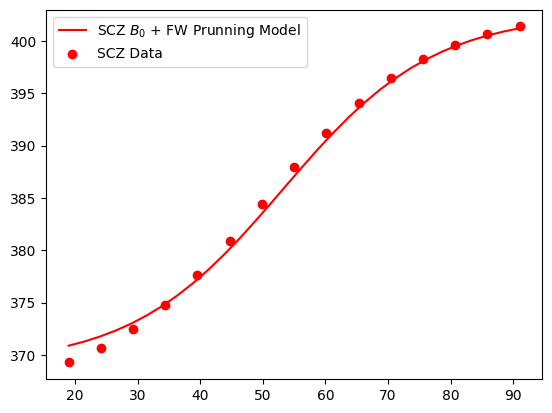

In [8]:
xf = SCZ_Model_RTs
yf = SCZ_RTs
m = (xf.size * np.sum(xf * yf) - np.sum(xf) * np.sum(yf)) / (
    xf.size * np.sum(xf * xf) - np.sum(xf) ** 2
)
bias = (np.sum(yf) - m * np.sum(xf)) / xf.size

ymin, ymax = np.min(m * xf + bias), np.max(m * xf + bias)
dc, h = fitting(mydistances, m * xf + bias)
mydistances_exp = np.linspace(mydistances[0], mydistances[-1], 30)
yf_exp = RTsig(mydistances_exp, dc, h)

plt.figure(1)
plt.plot(mydistances_exp, yf_exp, label="SCZ $B_0$ + FW Prunning Model", color="r")
plt.scatter(mydistances, yf, label="SCZ Data", color="r")
plt.legend()
print(m, bias)

In [9]:
from sklearn import metrics

print(metrics.root_mean_squared_error(yf, m * xf + bias))

1.152669812359427


In [11]:
def adjrmse(model, data, k):
    sse = np.sum(np.square(data - model))
    n = len(model)
    return np.sqrt(sse / (n - k))


scz_error = adjrmse(m * xf + bias, yf, 4)
print(scz_error)

1.3460283478330122
